In [ ]:
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, mean_squared_error, accuracy_score

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Import any other packages you may want to use
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

# import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.layers import Input, Dense, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
# Importing some machine learning modules
from sklearn.utils import shuffle
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

from google.colab import files

print("Modules are imported!")

Modules are imported!


# Load dataset

In [ ]:
train_df = pd.read_csv("NY-House-Dataset.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (4801, 17)


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


# Data exploration and cleaning

In [ ]:
# import pandas as pd

# def clean_data(df):
#     """
#     Cleans the input DataFrame.

#     Args:
#         df: The input DataFrame.

#     Returns:
#         The cleaned DataFrame.
#     """

#     # 1. Drop irrelevant columns (if any):
#     # You might have columns like 'ADDRESS', 'FORMATTED_ADDRESS',
#     # 'LONG_NAME' that are redundant or not useful for prediction.
#     # Example:
#     # df = df.drop(['ADDRESS', 'FORMATTED_ADDRESS', 'LONG_NAME'], axis=1)

#     # 2. Handle missing values:
#     # If you have missing values, decide on a strategy
#     # (imputation or removal).
#     # Example: Impute missing values in 'PROPERTYSQFT' with the mean
#     # df['PROPERTYSQFT'].fillna(df['PROPERTYSQFT'].mean(), inplace=True)

#     # 3. Handle outliers:
#     # You might want to identify and handle outliers in numerical
#     # features like 'PRICE', 'PROPERTYSQFT', etc.
#     # This could involve capping or removing extreme values.
#     # Example: (Using IQR method for outlier detection & removal)
#     # Q1 = df['PRICE'].quantile(0.25)
#     # Q3 = df['PRICE'].quantile(0.75)
#     # IQR = Q3 - Q1
#     # df = df[(df['PRICE'] >= Q1 - 1.5 * IQR) & (df['PRICE'] <= Q3 + 1.5 * IQR)]

#     # 4. Convert categorical features:
#     # Use one-hot encoding or other encoding methods to convert
#     # categorical features into numerical representations.
#     # Example:
#     # categorical_cols = ['BROKERTITLE', 'TYPE', 'STATE', ...]
#     # df = pd.get_dummies(df, columns=categorical_cols,
#     #                          dummy_na=False, drop_first=True)

#     return df

# # Apply the cleaning function to your DataFrame
# train_df_cleaned = clean_data(train_df.copy())

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [ ]:
train_df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


## Data exploration and cleaning

In [ ]:

# Display the first few rows of the training dataset
print("Training Data Preview:")
print(train_df.head())


# Get the shape of the datasets
print("\nTraining Data Shape:", train_df.shape)


# Summary of the training dataset
print("\nTraining Data Summary:")
print(train_df.info())

# Check for missing values in the training dataset
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())

# Descriptive statistics for numerical features in the training dataset
print("\nDescriptive Statistics for Training Data:")
print(train_df.describe())



def check_duplicates(df):
  """
  Checks for duplicate rows in the DataFrame.

  Args:
      df: The input DataFrame.

  Prints:
      The number of duplicate rows.
      (Optional) Prints the duplicate rows themselves.
  """

  # Find duplicate rows using duplicated()
  duplicate_rows = df[df.duplicated()]

  # Print the number of duplicate rows
  num_duplicates = len(duplicate_rows)
  print(f"\nNumber of duplicate rows: {num_duplicates}")

  #(Optional) Print the duplicate rows
  if num_duplicates > 0:
      print("\nDuplicate rows:")
      print(duplicate_rows.head(num_duplicates))

# Apply the check_duplicates function to your DataFrame
check_duplicates(train_df)

Training Data Preview:
                                         BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       PRICE  BEDS       BATH  PROPERTYSQFT  \
0     315000     2   2.000000        1400.0   
1  195000000     7  10.000000       17545.0   
2     260000     4   2.000000        2015.0   
3      69000     3   1.000000         445.0   
4   55000000     7   2.373861       14175.0   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 100

In [ ]:
# Assuming 'train_df' is your DataFrame

# Find all duplicate rows, including all occurrences
duplicate_rows = train_df[train_df.duplicated(keep=False)]

# Sort the duplicate rows for easier comparison
sorted_duplicates = duplicate_rows.sort_values(by=train_df.columns.tolist())

# Display the sorted duplicate rows
print(sorted_duplicates)

                                     BROKERTITLE                        TYPE  ...   LATITUDE  LONGITUDE
1618      Brokered by AAA Young Shuen Realty Inc              House for sale  ...  40.788666 -73.820793
1631      Brokered by AAA Young Shuen Realty Inc              House for sale  ...  40.788666 -73.820793
3820  Brokered by ATLANTIC PROPERTIES REALTY INC              House for sale  ...  40.579061 -73.961251
3836  Brokered by ATLANTIC PROPERTIES REALTY INC              House for sale  ...  40.579061 -73.961251
1044                  Brokered by Alexiou Realty  Multi-family home for sale  ...  40.775116 -73.902397
...                                          ...                         ...  ...        ...        ...
4296                    Brokered by qvtopservice              House for sale  ...  40.699555 -73.752709
3642                                    NoBroker              Condo for sale  ...  40.763958 -73.832596
3653                                    NoBroker              Co

In [ ]:
# Export the sorted duplicates to a CSV file
# sorted_duplicates.to_csv('sorted_duplicates.csv', index=False)

# print("Sorted duplicates exported to 'sorted_duplicates.csv'")

Sorted duplicates exported to 'sorted_duplicates.csv'


In [ ]:
# remove duplicate
train_df.drop_duplicates(keep='first', inplace=True)

In [ ]:
train_df.shape


(4587, 17)

Descriptive Statistics:
              PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  4.587000e+03  4587.000000  4587.000000   4587.000000  4587.000000   
mean   2.381172e+06     3.365816     2.377735   2177.712426    40.713932   
std    3.206831e+07     2.628808     1.968503   2283.095559     0.087738   
min    2.494000e+03     1.000000     0.000000    230.000000    40.499546   
25%    4.990000e+05     2.000000     1.000000   1200.000000    40.638588   
50%    8.250000e+05     3.000000     2.000000   2184.207862    40.726667   
75%    1.498500e+06     4.000000     3.000000   2184.207862    40.771913   
max    2.147484e+09    50.000000    50.000000  65535.000000    40.912729   

         LONGITUDE  
count  4587.000000  
mean    -73.941584  
std       0.101276  
min     -74.253033  
25%     -73.987420  
50%     -73.949116  
75%     -73.869455  
max     -73.702450  




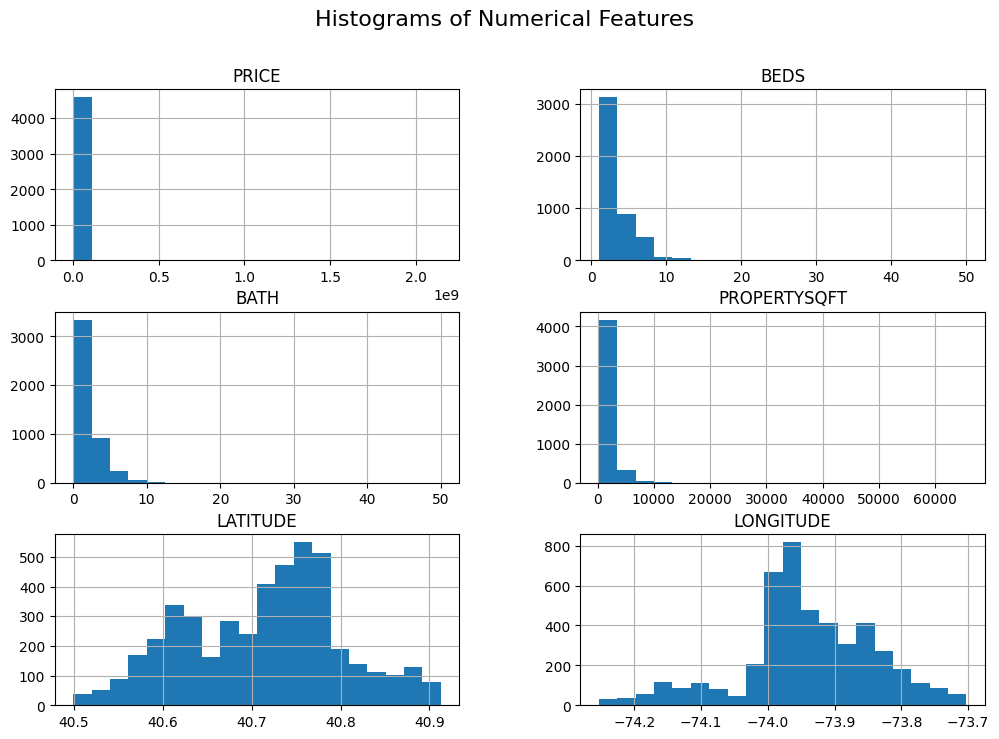

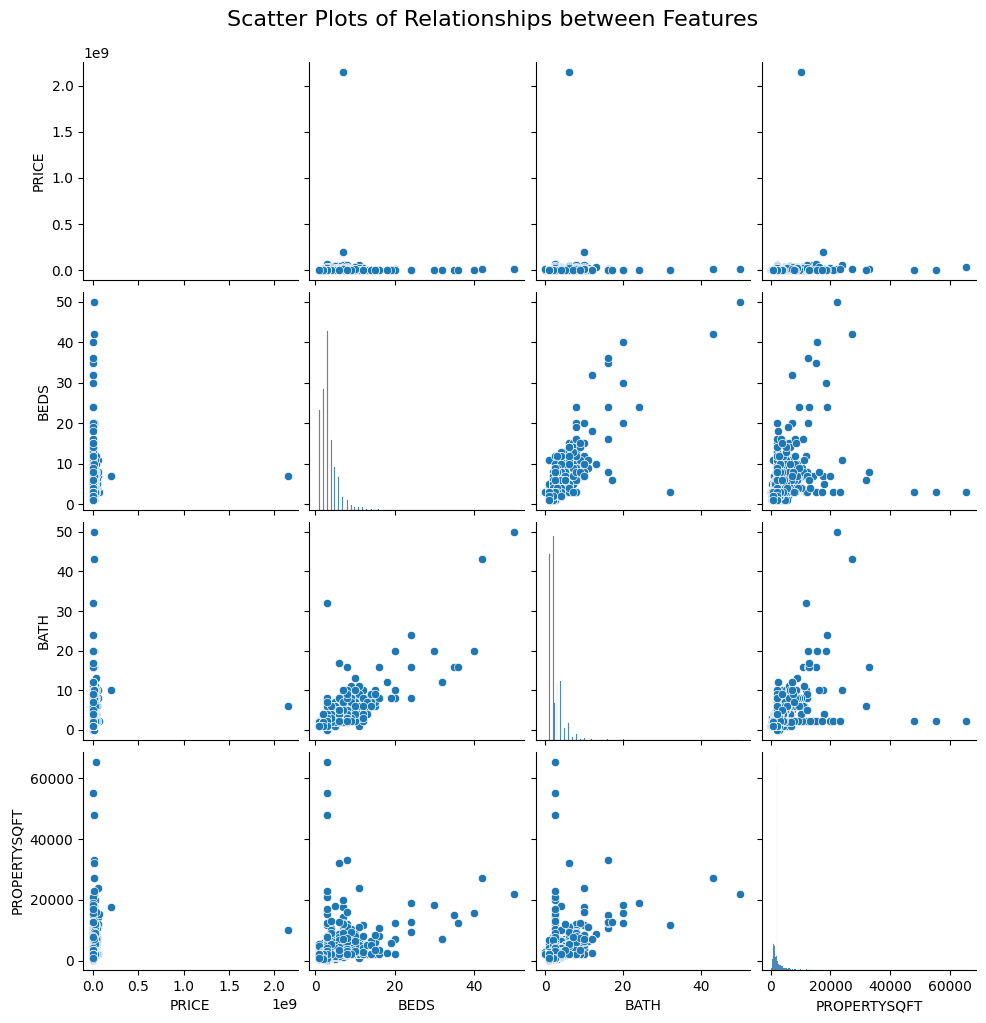


Value Counts for BROKERTITLE:
BROKERTITLE
Brokered by COMPASS                                      435
Brokered by Douglas Elliman - 575 Madison Ave            109
Brokered by Brown Harris Stevens                          93
Brokered by Corcoran East Side                            86
Brokered by RE MAX Edge                                   75
                                                        ... 
Brokered by Grandeur Realty, Inc.                          1
Brokered by Eva Real Estate LLC                            1
Brokered by Cruz Network The Bronx Realty                  1
Brokered by Howard Hanna Coach Realtors - Floral Park      1
Brokered by New York Way Real Estate Corp                  1
Name: count, Length: 1036, dtype: int64

Value Counts for TYPE:
TYPE
Co-op for sale                1388
House for sale                 966
Condo for sale                 842
Multi-family home for sale     699
Townhouse for sale             288
Pending                        229
Conting

In [ ]:
# Assuming 'train_df' is your DataFrame

def explore_data(df):
  """
  Performs data exploration on the input DataFrame.

  Args:
      df: The input DataFrame.

  Generates:
      Descriptive statistics, histograms, and scatter plots.
  """

  # 1. Descriptive statistics
  print("Descriptive Statistics:")
  print(df.describe())
  print("\n")  # Add a newline for better readability

  # 2. Histograms for numerical features
  numerical_features = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
  df[numerical_features].hist(bins=20, figsize=(12, 8))
  plt.suptitle("Histograms of Numerical Features", fontsize=16)
  plt.show()

  # 3. Scatter plots for relationships between features
  sns.pairplot(df[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']])
  plt.suptitle("Scatter Plots of Relationships between Features", fontsize=16, y=1.02)  # Adjust title position
  plt.show()

  # 4. Explore categorical features (e.g., BROKERTITLE, TYPE, STATE)
  categorical_features = ['BROKERTITLE', 'TYPE', 'STATE']
  for feature in categorical_features:
    print(f"\nValue Counts for {feature}:")
    print(df[feature].value_counts())

# Apply the explore_data function to your DataFrame
explore_data(train_df)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4587 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4587 non-null   object 
 1   TYPE                         4587 non-null   object 
 2   PRICE                        4587 non-null   int64  
 3   BEDS                         4587 non-null   int64  
 4   BATH                         4587 non-null   float64
 5   PROPERTYSQFT                 4587 non-null   float64
 6   ADDRESS                      4587 non-null   object 
 7   STATE                        4587 non-null   object 
 8   MAIN_ADDRESS                 4587 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4587 non-null   object 
 10  LOCALITY                     4587 non-null   object 
 11  SUBLOCALITY                  4587 non-null   object 
 12  STREET_NAME                  4587 non-null   object 
 13  LONG_NAME              

In [ ]:
train_df = train_df.drop(['ADDRESS', 'FORMATTED_ADDRESS', 'LONG_NAME'], axis=1)

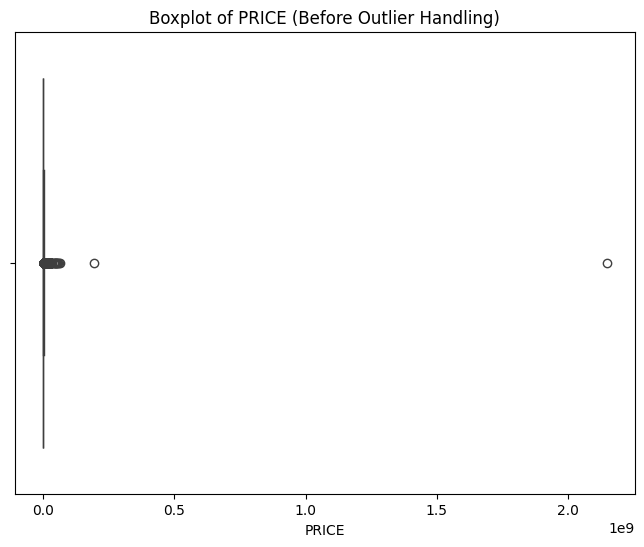

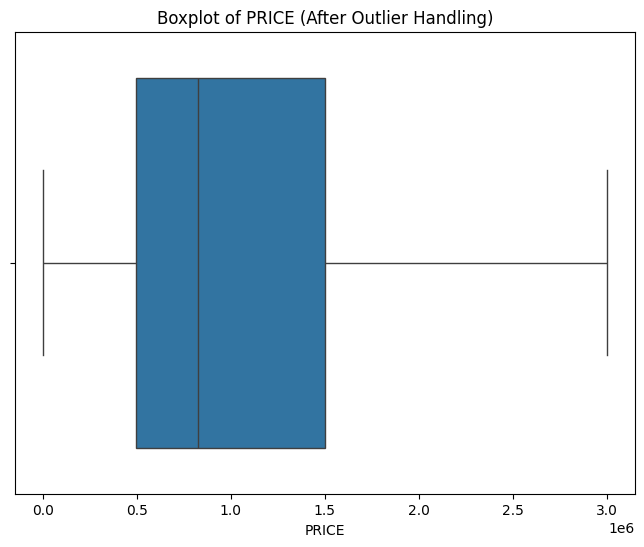

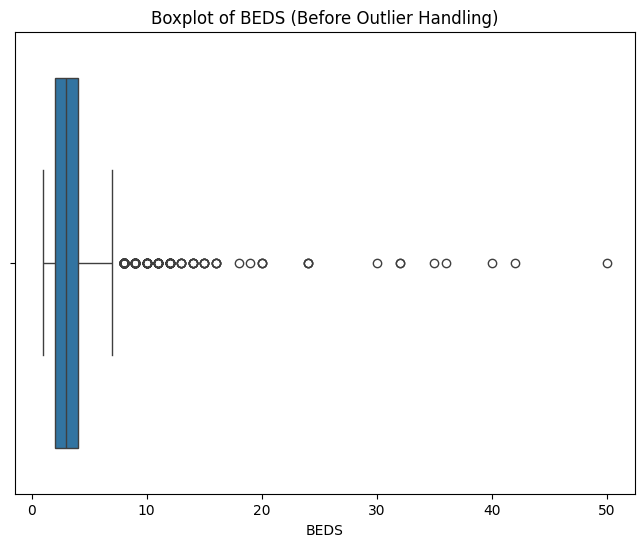

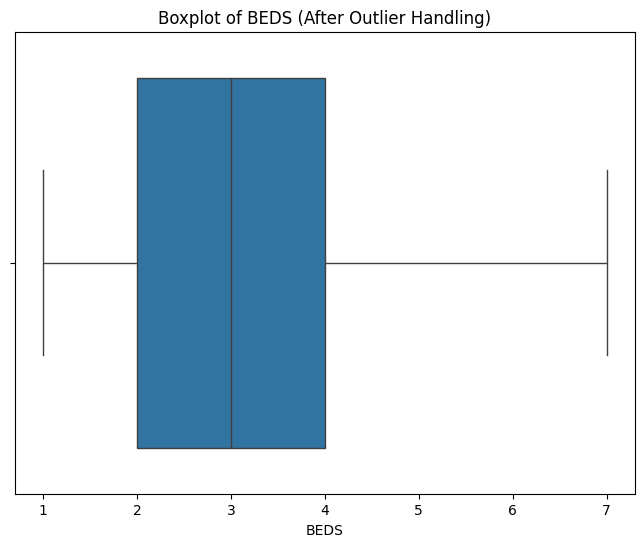

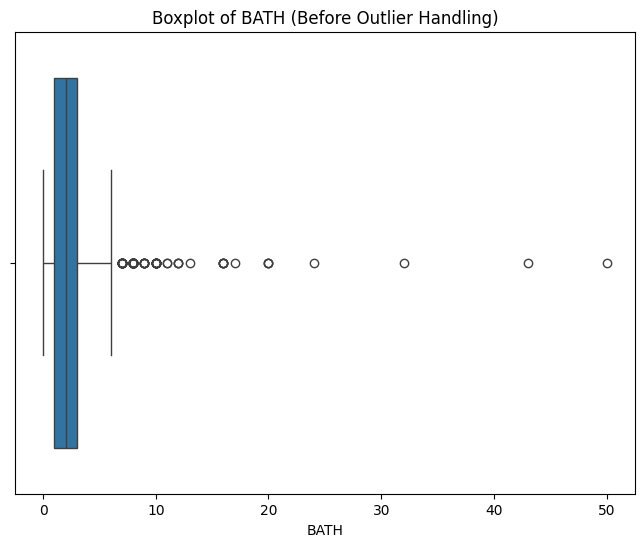

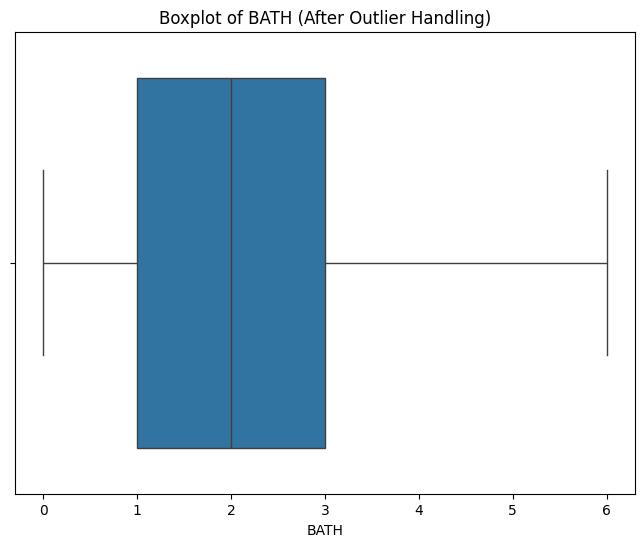

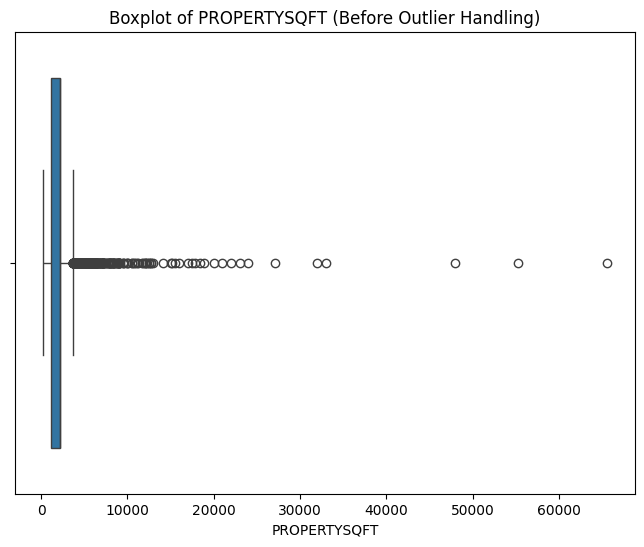

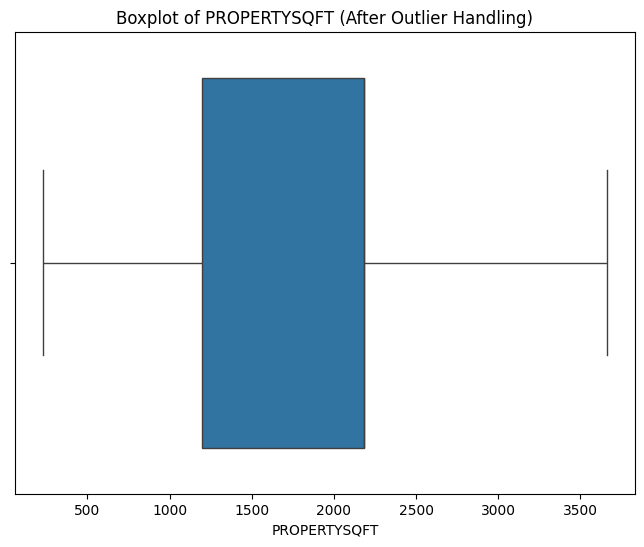

Outliers handled using IQR method and capping.


In [ ]:

def handle_outliers_iqr(df, column):
  """
  Handles outliers in the specified column using the IQR method.
  Plots a boxplot before and after handling.

  Args:
      df: The input DataFrame.
      column: The name of the column to handle outliers in.

  Returns:
      The DataFrame with outliers capped.
  """

  # Plot boxplot before outlier handling
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f"Boxplot of {column} (Before Outlier Handling)")
  plt.show()

  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Cap outliers
  df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

  # Plot boxplot after outlier handling
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f"Boxplot of {column} (After Outlier Handling)")
  plt.show()

  return df

# Apply outlier handling to specific numerical columns
for column in ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']:
  train_df = handle_outliers_iqr(train_df, column)

print("Outliers handled using IQR method and capping.")

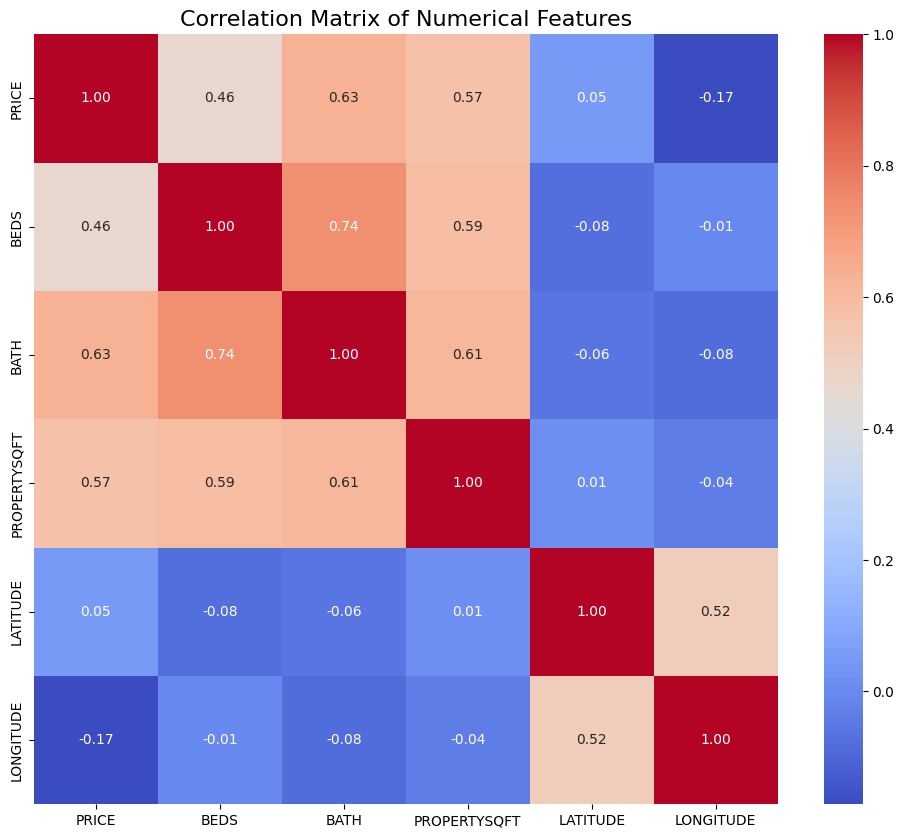

In [ ]:

# Assuming 'train_df' is your DataFrame

# Select only numerical columns for correlation
numerical_features = train_df.select_dtypes(include=['number']).columns
numerical_df = train_df[numerical_features]

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.show()

In [ ]:
train_df.head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,2997750,7,6.000000,3660.519655,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,2997750,7,2.373861,3660.519655,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,40.767224,-73.969856
5,Brokered by Sowae Corp,House for sale,690000,5,2.000000,3660.519655,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,40.674363,-73.958725
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.000000,2184.207862,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,40.809448,-73.946777
7,Brokered by Connie Profaci Realty,House for sale,2997750,7,6.000000,3660.519655,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,40.595002,-74.106424
8,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1.000000,750.000000,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,40.821586,-73.874089
9,Brokered by CENTURY 21 MK Realty,Co-op for sale,440000,2,1.000000,978.000000,"Brooklyn, NY 11230","1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230",New York,Kings County,Brooklyn,Midwood,40.615738,-73.969694


In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
  """Calculates Cramér's V statistic for categorical-categorical association.
  """
  confusion_matrix = pd.crosstab(x, y)
  chi2 = chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2 = chi2 / n
  r, k = confusion_matrix.shape
  phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
  rcorr = r - ((r - 1)**2) / (n - 1)
  kcorr = k - ((k - 1)**2) / (n - 1)
  return np.sqrt(phi2corr / min(kcorr - 1, rcorr - 1))

def correlation_ratio(categories, measurements):
  """Calculates the correlation ratio for categorical-numerical association.
  """
  fcat, _ = pd.factorize(categories)
  cat_num = np.max(fcat) + 1
  y_avg_array = np.zeros(cat_num)
  n_array = np.zeros(cat_num)
  for i in range(0, cat_num):
    cat_measures = measurements[np.argwhere(fcat == i).flatten()]
    n_array[i] = len(cat_measures)
    y_avg_array[i] = np.mean(cat_measures)
  y_avg = np.mean(measurements)
  numerator = np.sum(n_array * (y_avg_array - y_avg)**2)
  denominator = np.sum((measurements - y_avg)**2)
  if denominator == 0:
    return 0
  else:
    return np.sqrt(numerator / denominator)

# Assuming 'train_df' is your DataFrame

# 1. Automatically identify categorical features
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()

# 2. Label Encoding for categorical features
label_encoders = {}  # Store LabelEncoders for each categorical feature
for feature in categorical_features:
    le = LabelEncoder()
    train_df[feature] = le.fit_transform(train_df[feature])
    label_encoders[feature] = le  # Store the encoder

# 3. Correlation matrix for all features (numerical and encoded categorical)
correlation_matrix = train_df.corr()

# 4. Cramér's V for categorical associations
categorical_corr = pd.DataFrame(index=categorical_features, columns=categorical_features)
for i in categorical_features:
    for j in categorical_features:
        categorical_corr.loc[i, j] = cramers_v(train_df[i], train_df[j])

# Resetting the index of dataframes
train_df = train_df.reset_index(drop=True)
# train_df_encoded = train_df_encoded.reset_index(drop=True)

# 5. Correlation ratio for numerical-categorical relationships
num_cat_corr = pd.DataFrame(index=numerical_features, columns=categorical_features)
for num_idx, i in enumerate(numerical_features):
    for cat_idx, j in enumerate(categorical_features):
        num_cat_corr.iloc[num_idx, cat_idx] = correlation_ratio(train_df[j], train_df_encoded[i])

# Combine all correlation matrices (if needed)
# ...

# Plot the correlation matrix (for numerical features)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.show()

# Print Cramér's V and Correlation Ratio (optional)
print("\nCramér's V for Categorical Associations:")
print(categorical_corr)
print("\nCorrelation Ratio for Numerical-Categorical Relationships:")
print(num_cat_corr)

NameError: name 'train_df_encoded' is not defined

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4587 entries, 0 to 4586
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4587 non-null   int64  
 1   TYPE                         4587 non-null   int64  
 2   PRICE                        4587 non-null   int64  
 3   BEDS                         4587 non-null   int64  
 4   BATH                         4587 non-null   float64
 5   PROPERTYSQFT                 4587 non-null   float64
 6   STATE                        4587 non-null   int64  
 7   MAIN_ADDRESS                 4587 non-null   int64  
 8   ADMINISTRATIVE_AREA_LEVEL_2  4587 non-null   int64  
 9   LOCALITY                     4587 non-null   int64  
 10  SUBLOCALITY                  4587 non-null   int64  
 11  STREET_NAME                  4587 non-null   int64  
 12  LATITUDE                     4587 non-null   float64
 13  LONGITUDE         

# Feature Engineering

In [ ]:
def feature_engineering_with_label_encoding(df):
    """
    Performs feature engineering on the input DataFrame (with label encoding).

    Args:
        df: The input DataFrame.

    Returns:
        The DataFrame with engineered features.
    """

    # Feature Scaling for numerical features:
    numerical_features = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    return df

# Apply feature engineering to your training DataFrame
train_df_engineered = feature_engineering_with_label_encoding(train_df.copy())

In [ ]:
train_df_engineered.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LATITUDE,LONGITUDE
0,296,2,-0.935744,-0.686217,-0.208263,-0.619137,207,1421,26,4,10,56,0.539423,-0.324881
1,907,2,2.090618,2.253889,2.787183,2.041838,205,4577,28,4,12,117,0.597996,-0.389143
2,927,7,-0.997788,0.489825,-0.208263,0.104811,301,3684,28,4,16,153,-1.962052,-2.513448
3,179,2,-1.213252,-0.098196,-0.957124,-1.743318,161,1423,28,4,12,117,0.541052,-0.326159
4,923,12,2.090618,2.253889,0.071707,2.041838,227,3278,28,4,12,117,0.607457,-0.279186


# using linear regression model - rmse 0.69

---



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Assuming 'train_df_engineered' is your DataFrame with engineered features

# 1. Separate features (X) and target (y)
X = train_df_engineered.drop('PRICE', axis=1)
y = train_df_engineered['PRICE']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the parameter grid for GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1], # Try different values for n_jobs if needed
    'positive': [True, False] # Try different values for positive if needed
}

# 4. Create and train the Linear Regression model with GridSearchCV
model = LinearRegression()
grid_search = GridSearchCV(model, param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=3)
grid_search.fit(X_train, y_train)

# 5. Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# 6. Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# 7. Evaluate the best model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 8. Print the RMSE score and best hyperparameters
print(f"Best Hyperparameters: {best_params}")
print(f"RMSE: {rmse}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END copy_X=True, fit_intercept=True, n_jobs=None, positive=True;, score=-0.717 total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=True, n_jobs=None, positive=True;, score=-0.735 total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=True, n_jobs=None, positive=True;, score=-0.716 total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=True, n_jobs=None, positive=True;, score=-0.731 total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=True, n_jobs=None, positive=True;, score=-0.744 total time=   0.0s
[CV 1/5] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False;, score=-0.683 total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False;, score=-0.681 total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False;, score=-0.658 total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False;, scor

# Using Random Forest Regressor - rmse 0.43

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming 'train_df_engineered' is your DataFrame with engineered features

# 1. Separate features (X) and target (y)
X = train_df_engineered.drop('PRICE', axis=1)
y = train_df_engineered['PRICE']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 4. Create and train the Random Forest Regressor model with GridSearchCV
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=3)
grid_search.fit(X_train, y_train)

# 5. Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# 6. Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# 7. Evaluate the best model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 8. Print the RMSE score and best hyperparameters
print(f"Best Hyperparameters: {best_params}")
print(f"RMSE: {rmse}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.451 total time=   3.6s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.456 total time=   3.4s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.400 total time=   2.7s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.452 total time=   3.2s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.457 total time=   2.4s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.450 total time=   4.6s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.454 total time=   5.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, sc

TypeError: got an unexpected keyword argument 'squared'

In [ ]:
# 7. Evaluate the best model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 8. Print the RMSE score and best hyperparameters
print(f"Best Hyperparameters: {best_params}")
print(f"RMSE: {rmse}")

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
RMSE: 0.4314803529664193


# Using boosting gradient Regressor - RMSE 0.408

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Assuming 'train_df_engineered' is your DataFrame with engineered features

# 1. Separate features (X) and target (y)
X = train_df_engineered.drop('PRICE', axis=1)
y = train_df_engineered['PRICE']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 4. Create and train the Gradient Boosting Regressor model with GridSearchCV
model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=3)
grid_search.fit(X_train, y_train)

# 5. Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# 6. Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# 7. Evaluate the best model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 8. Print the RMSE score and best hyperparameters
print(f"Best Hyperparameters: {best_params}")
print(f"RMSE: {rmse}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.661 total time=   0.9s
[CV 2/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.659 total time=   0.9s
[CV 3/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.654 total time=   0.9s
[CV 4/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.684 total time=   0.9s
[CV 5/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.688 total time=   0.9s
[CV 1/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.545 total time=   1.8s
[CV 2/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, sc

# Using Support Vector Regressor - not working

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Assuming 'train_df_engineered' is your DataFrame with engineered features

# 1. Separate features (X) and target (y)
X = train_df_engineered.drop('PRICE', axis=1)
y = train_df_engineered['PRICE']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Define the parameter grid for GridSearchCV
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto']
}

# 5. Create and train the SVR model with GridSearchCV
model = SVR()
grid_search = GridSearchCV(model, param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=3)
grid_search.fit(X_train, y_train)

# 6. Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# 7. Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# 8. Evaluate the best model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 9. Print the RMSE score and best hyperparameters
print(f"Best Hyperparameters: {best_params}")
print(f"RMSE: {rmse}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits


KeyboardInterrupt: 

# Using TF neural network - rmse 2.86

In [ ]:
import pandas as pd
import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras


# Assuming 'train_df_engineered' is your DataFrame with engineered features

# 1. Separate features (X) and target (y)
X = train_df_engineered.drop('PRICE', axis=1).values  # Convert to NumPy array
y = train_df_engineered['PRICE'].values  # Convert to NumPy array

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer with 1 neuron for regression
])

# 4. Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])  # Use 'mse' for RMSE calculation

# 5. Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)  # Adjust epochs and batch_size as needed

# 6. Make predictions on the test set
y_pred = model.predict(X_test)

# 7. Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE

# 8. Print the RMSE score
print(f"RMSE: {rmse}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
115/115 - 4s - 32ms/step - loss: 1890.7656 - mse: 1890.7656
Epoch 2/100
115/115 - 0s - 2ms/step - loss: 11.6242 - mse: 11.6242
Epoch 3/100
115/115 - 0s - 3ms/step - loss: 6.2163 - mse: 6.2163
Epoch 4/100
115/115 - 0s - 3ms/step - loss: 4.7677 - mse: 4.7677
Epoch 5/100
115/115 - 0s - 2ms/step - loss: 3.6767 - mse: 3.6767
Epoch 6/100
115/115 - 0s - 3ms/step - loss: 3.5371 - mse: 3.5371
Epoch 7/100
115/115 - 0s - 3ms/step - loss: 3.5089 - mse: 3.5089
Epoch 8/100
115/115 - 0s - 3ms/step - loss: 3.4754 - mse: 3.4754
Epoch 9/100
115/115 - 0s - 3ms/step - loss: 2.8834 - mse: 2.8834
Epoch 10/100
115/115 - 0s - 2ms/step - loss: 2.3162 - mse: 2.3162
Epoch 11/100
115/115 - 0s - 3ms/step - loss: 2.3396 - mse: 2.3396
Epoch 12/100
115/115 - 0s - 2ms/step - loss: 3.0097 - mse: 3.0097
Epoch 13/100
115/115 - 0s - 3ms/step - loss: 1.8883 - mse: 1.8883
Epoch 14/100
115/115 - 0s - 3ms/step - loss: 2.6100 - mse: 2.6100
Epoch 15/100
115/115 - 0s - 4ms/step - loss: 2.0717 - mse: 2.0717
Epoch 16/1

# Using ensemble methods on neural network with more layers and batchnormalization - rmse 0.59

In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.linear_model import LinearRegression  # Meta-model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor


# Assuming 'train_df_engineered' is your DataFrame with engineered features

# 1. Separate features (X) and target (y)
X = train_df_engineered.drop('PRICE', axis=1).values
y = train_df_engineered['PRICE'].values

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the neural network model (same as before)
def create_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

# 4. Create an ensemble of models
n_models = 5  # Number of models in the ensemble
ensemble_models = []
for _ in range(n_models):
    model = create_model()
    ensemble_models.append(model)

# 5. Train each model using K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
for i, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Training model {i + 1}/{n_models}...")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    ensemble_models[i].fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=2)

# 6. Create the meta-model (e.g., Linear Regression)
meta_model = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors

# 7. Create training data for the meta-model
# Use out-of-fold predictions from the base models
meta_X_train = np.zeros((X_train.shape[0], n_models))
for i, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    meta_X_train[val_index, i] = ensemble_models[i].predict(X_val_fold).ravel()

# 8. Train the meta-model
meta_model.fit(meta_X_train, y_train)

# 9. Make predictions on the test set using the ensemble and meta-model
base_predictions = [model.predict(X_test) for model in ensemble_models]
meta_X_test = np.column_stack(base_predictions)  # Stack base model predictions
y_pred = meta_model.predict(meta_X_test)  # Meta-model prediction

# 10. Evaluate the ensemble using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 11. Print the RMSE score
print(f"Stacked Ensemble RMSE: {rmse}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model 1/5...
Epoch 1/100
92/92 - 4s - 49ms/step - loss: 1.1412 - mse: 1.1412
Epoch 2/100
92/92 - 1s - 15ms/step - loss: 0.9930 - mse: 0.9930
Epoch 3/100
92/92 - 1s - 16ms/step - loss: 0.9703 - mse: 0.9703
Epoch 4/100
92/92 - 1s - 14ms/step - loss: 0.8387 - mse: 0.8387
Epoch 5/100
92/92 - 1s - 10ms/step - loss: 0.7334 - mse: 0.7334
Epoch 6/100
92/92 - 1s - 13ms/step - loss: 0.6619 - mse: 0.6619
Epoch 7/100
92/92 - 1s - 14ms/step - loss: 0.6147 - mse: 0.6147
Epoch 8/100
92/92 - 1s - 7ms/step - loss: 0.5795 - mse: 0.5795
Epoch 9/100
92/92 - 1s - 13ms/step - loss: 0.5439 - mse: 0.5439
Epoch 10/100
92/92 - 1s - 7ms/step - loss: 0.5423 - mse: 0.5423
Epoch 11/100
92/92 - 1s - 7ms/step - loss: 0.5661 - mse: 0.5661
Epoch 12/100
92/92 - 1s - 14ms/step - loss: 0.5399 - mse: 0.5399
Epoch 13/100
92/92 - 1s - 7ms/step - loss: 0.5041 - mse: 0.5041
Epoch 14/100
92/92 - 1s - 14ms/step - loss: 0.5142 - mse: 0.5142
Epoch 15/100
92/92 - 1s - 8ms/step - loss: 0.4838 - mse: 0.4838
Epoch 16/100
92/9

Stack ensemble performance using LinearRegression - rmse 2.47


Stack ensemble performance using Boost Gradient Regressor - rmse 0.89

Stack ensemble performance using Support Vector Regressor - rmse 0.93

Stack ensemble performance using Random Forest Regressor - rmse 0.63

Stack ensemble performance using extreme randomizes Trees Regressor - rmse 0.63

Stack ensemble performance using KNN Regressor - rmse 0.606

# using neural network with stack ensemble of using KNN model with GridSearchCV - RMSE 0.66

In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from sklearn.linear_model import LinearRegression  # Meta-model
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor


# Assuming 'train_df_engineered' is your DataFrame with engineered features

# 1. Separate features (X) and target (y)
X = train_df_engineered.drop('PRICE', axis=1).values
y = train_df_engineered['PRICE'].values

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the neural network model (same as before)
def create_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

# 4. Create an ensemble of models
n_models = 5  # Number of models in the ensemble
ensemble_models = []
for _ in range(n_models):
    model = create_model()
    ensemble_models.append(model)

# 5. Train each model using K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
for i, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Training model {i + 1}/{n_models}...")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    ensemble_models[i].fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=2)

# 6. Create the meta-model (e.g., Linear Regression)
# meta_model = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors

# 7. Create training data for the meta-model
# Use out-of-fold predictions from the base models
meta_X_train = np.zeros((X_train.shape[0], n_models))
for i, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    meta_X_train[val_index, i] = ensemble_models[i].predict(X_val_fold).ravel()

# 4. Define the parameter grid for GridSearchCV for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Explore different values for n_neighbors
    'weights': ['uniform', 'distance'],  # Try different weight options
    'p': [1, 2]  # Experiment with different distance metrics (Manhattan, Euclidean)
}

# 5. Create and train the KNN Regressor meta-model with GridSearchCV
meta_model = KNeighborsRegressor()
grid_search_knn = GridSearchCV(meta_model, param_grid_knn,
                               scoring='neg_root_mean_squared_error', cv=5, verbose=3)
grid_search_knn.fit(meta_X_train, y_train)

# 6. Get the best KNN model and its hyperparameters
best_knn_model = grid_search_knn.best_estimator_
best_knn_params = grid_search_knn.best_params_

# 7. Make predictions on the test set using the ensemble and best KNN meta-model
base_predictions = [model.predict(X_test) for model in ensemble_models]
meta_X_test = np.column_stack(base_predictions)
y_pred = best_knn_model.predict(meta_X_test)

# 10. Evaluate the ensemble using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 11. Print the RMSE score
print(f"Stacked Ensemble RMSE: {rmse}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model 1/5...
Epoch 1/100
92/92 - 11s - 124ms/step - loss: 1.1276 - mse: 1.1276
Epoch 2/100
92/92 - 1s - 7ms/step - loss: 1.0125 - mse: 1.0125
Epoch 3/100
92/92 - 1s - 14ms/step - loss: 0.9848 - mse: 0.9848
Epoch 4/100
92/92 - 1s - 14ms/step - loss: 0.9137 - mse: 0.9137
Epoch 5/100
92/92 - 1s - 8ms/step - loss: 0.7965 - mse: 0.7965
Epoch 6/100
92/92 - 1s - 9ms/step - loss: 0.7052 - mse: 0.7052
Epoch 7/100
92/92 - 2s - 16ms/step - loss: 0.6763 - mse: 0.6763
Epoch 8/100
92/92 - 1s - 14ms/step - loss: 0.6009 - mse: 0.6009
Epoch 9/100
92/92 - 1s - 9ms/step - loss: 0.5403 - mse: 0.5403
Epoch 10/100
92/92 - 1s - 8ms/step - loss: 0.5199 - mse: 0.5199
Epoch 11/100
92/92 - 1s - 13ms/step - loss: 0.4989 - mse: 0.4989
Epoch 12/100
92/92 - 1s - 14ms/step - loss: 0.5108 - mse: 0.5108
Epoch 13/100
92/92 - 1s - 9ms/step - loss: 0.5006 - mse: 0.5006
Epoch 14/100
92/92 - 1s - 12ms/step - loss: 0.4969 - mse: 0.4969
Epoch 15/100
92/92 - 1s - 13ms/step - loss: 0.4697 - mse: 0.4697
Epoch 16/100
92/